In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import requests
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import pickle

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Datasets

### Airbnb Listings Data

In [ ]:
x1 = '/content/drive/My Drive/DSCI599/project-599/listings_withzip.csv'

In [ ]:
cols = ["id", "host_id", "host_since", "host_location", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", "minimum_nights",
        "maximum_nights", "host_identity_verified", "property_type", "room_type", "accommodates", "amenities", "beds", "price", "availability_30", "number_of_reviews", "review_scores_rating",
        "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value",
        "instant_bookable", "latitude", "longitude", "zipcode"]

listings = pd.read_csv(x1, usecols=cols)
listings = listings[cols]

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45591 entries, 0 to 45590
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45591 non-null  int64  
 1   host_id                      45591 non-null  int64  
 2   host_since                   45575 non-null  object 
 3   host_location                34351 non-null  object 
 4   host_response_time           34863 non-null  object 
 5   host_response_rate           34863 non-null  object 
 6   host_acceptance_rate         35953 non-null  object 
 7   host_is_superhost            45342 non-null  object 
 8   host_has_profile_pic         45575 non-null  object 
 9   minimum_nights               45591 non-null  int64  
 10  maximum_nights               45591 non-null  int64  
 11  host_identity_verified       45575 non-null  object 
 12  property_type                45591 non-null  object 
 13  room_type       

In [ ]:
listings.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode
0,109,521,2008-06-27,"San Francisco, CA",NaN,NaN,50%,f,t,30,...,5.00,5.00,3.00,4.00,5.00,4.00,f,33.98301,-118.38607,90230.0
1,2708,3008,2008-09-16,"Los Angeles, CA",NaN,NaN,100%,t,t,30,...,4.80,4.93,5.00,4.98,4.95,4.88,t,34.09625,-118.34605,90038.0
2,2732,3041,2008-09-17,"Santa Monica, CA",within an hour,100%,42%,f,t,7,...,4.26,4.58,4.39,4.48,4.91,4.22,f,34.00440,-118.48095,90401.0
3,2864,3207,2008-09-25,"Bellflower, CA",NaN,NaN,NaN,f,t,30,...,NaN,NaN,NaN,NaN,NaN,NaN,f,33.87490,-118.11515,90706.0
4,63416,309512,2010-12-04,"Los Angeles, CA",within an hour,100%,96%,t,t,2,...,4.92,4.92,4.97,4.97,4.97,4.90,f,34.11344,-118.32399,90028.0


### Review/Bookings Data

In [ ]:
x2 = '/content/drive/My Drive/DSCI599/project-599/reviews.csv'

In [ ]:
reviews = pd.read_csv(x2)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528123 entries, 0 to 1528122
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1528123 non-null  int64 
 1   date        1528123 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.3+ MB


In [ ]:
reviews.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


### Attractions Data

In [ ]:
x3 = '/content/drive/My Drive/DSCI599/project-599/attractions.csv'
att = pd.read_csv(x3)

In [ ]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44513 entries, 0 to 44512
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   latitude                44513 non-null  float64
 1   longitude               44513 non-null  float64
 2   num_nearby_attractions  44513 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.0 MB


In [ ]:
att.head()

,latitude,longitude,num_nearby_attractions
0,34.661410,-118.233730,0
1,34.072453,-118.264551,9
2,34.077840,-118.350270,5
3,34.051730,-118.394640,1
4,34.050127,-118.458775,1


### Crime Data

In [ ]:
x4 = '/content/drive/My Drive/DSCI599/project-599/crime_withzip.csv'

In [ ]:
cols = ["Crm Cd Desc", "zipcode"]

crime = pd.read_csv(x4, usecols=cols)
crime = crime[cols]

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Crm Cd Desc  925720 non-null  object
 1   zipcode      925720 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.1+ MB


In [ ]:
crime.head()

,Crm Cd Desc,zipcode
0,VEHICLE - STOLEN,90019
1,BURGLARY FROM VEHICLE,90079
2,BIKE - STOLEN,90018
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),91401
4,THEFT OF IDENTITY,90038


# Data Preprocessing

### Airbnb Listings Data

In [ ]:
# Drop any rows with missing values in the 'price' column
listings = listings.dropna(subset=['price'])

# Convert the 'price' column to float
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert the 'host_since' column to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Calculate the number of months till the current date
current_date = datetime.now()
listings['host_since'] = listings['host_since'].apply(lambda x: (current_date.year - x.year) * 12 + current_date.month - x.month)

# Convert the 'amenities' column to a list of amenities
listings['amenities'] = listings['amenities'].apply(eval)

# Convert the 'host_response_rate', 'host_acceptance_rate' columns to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype(float) / 100
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# Convert columns to boolean
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': True, 'f': False})
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': True, 'f': False})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': True, 'f': False})
listings['instant_bookable'] = listings['instant_bookable'].map({'t': True, 'f': False})

# Replace non-numeric values with NaN
listings['zipcode'] = listings['zipcode'].replace([r'[^0-9]+'], np.nan, regex=True)

# Replace infinite values with NaN
listings['zipcode'] = listings['zipcode'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with 0
listings['zipcode'] = listings['zipcode'].fillna(0)

# Convert to float first to remove decimals, then to int
listings['zipcode'] = listings['zipcode'].astype(float).astype(int)

# Drop any rows with missing values in the 'review_scores_rating' column
listings = listings.dropna(subset=['review_scores_rating'])

In [ ]:
# Check for null values in each column
null_counts = listings.isnull().sum()
null_counts

id                                0
host_id                           0
host_since                       11
host_location                  6639
host_response_time             6171
host_response_rate             6171
host_acceptance_rate           4980
host_is_superhost               202
host_has_profile_pic             11
minimum_nights                    0
maximum_nights                    0
host_identity_verified           11
property_type                     0
room_type                         0
accommodates                      0
amenities                         0
beds                            285
price                             0
availability_30                   0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy           12
review_scores_cleanliness        13
review_scores_checkin            20
review_scores_communication      13
review_scores_location           22
review_scores_value              26
instant_bookable            

In [ ]:
# Drop rows with missing values in critical columns
critical_cols = ['id', 'host_id', 'property_type', 'room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights']
listings = listings.dropna(subset=critical_cols)

# Fill missing values in 'host_since' column with the minimum date
listings['host_since'] = listings['host_since'].fillna(listings['host_since'].min())

# Fill missing values in 'host_response_rate' and 'host_acceptance_rate' with 0
listings['host_response_rate'] = listings['host_response_rate'].fillna(0)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(0)

# Fill missing values in 'host_is_superhost' with False
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(False)

# Fill missing values in 'host_has_profile_pic' and 'host_identity_verified' with False
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(False)
listings['host_identity_verified'] = listings['host_identity_verified'].fillna(False)

# Fill missing values in 'host_location' with 'Unknown'
listings['host_location'] = listings['host_location'].fillna('Unknown')

# Fill missing values in 'host_response_time' with the mode
mode_response_time = listings['host_response_time'].mode()[0]
listings['host_response_time'] = listings['host_response_time'].fillna(mode_response_time)

# Fill missing values in 'beds' column with median
imputer = SimpleImputer(strategy='median')
listings['beds'] = imputer.fit_transform(listings[['beds']])

listings = listings.rename(columns={'id': 'listing_id'})

# Drop rows with missing values in 'review_scores' columns
listings = listings.dropna(subset=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                   'review_scores_value'])

In [ ]:
# Check for null values in each column
null_counts = listings.isnull().sum()
null_counts

listing_id                     0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_has_profile_pic           0
minimum_nights                 0
maximum_nights                 0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
amenities                      0
beds                           0
price                          0
availability_30                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
latitude                       0
longitude                      0
zipcode   

In [ ]:
# Remove outliers in the price column
# Define outliers as any value beyond 3 standard deviations from the mean
price_mean = listings['price'].mean()
price_std = listings['price'].std()
price_cutoff = price_std * 3

lower_limit = price_mean - price_cutoff
upper_limit = price_mean + price_cutoff

listings = listings[(listings['price'] >= lower_limit) & (listings['price'] <= upper_limit)]

In [ ]:
listings["host_is_superhost"] = listings["host_is_superhost"].astype(int)
listings["host_has_profile_pic"] = listings["host_has_profile_pic"].astype(int)
listings["host_identity_verified"] = listings["host_identity_verified"].astype(int)
listings["instant_bookable"] = listings["instant_bookable"].astype(int)

In [ ]:
# Map 'host_response_time' and 'room_type' to numeric values

host_response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 12,
    'within a day': 24,
    'a few days or more' : 48
}

room_type_mapping = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
}

# Applying the replacement
listings['host_response_time'] = listings['host_response_time'].replace(host_response_time_mapping)
listings['room_type'] = listings['room_type'].replace(room_type_mapping)

In [ ]:
listings.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode
0,109,521,190.0,"San Francisco, CA",1,0.0,0.50,0,1,30,...,5.00,5.00,3.00,4.00,5.00,4.00,0,33.98301,-118.38607,90230
1,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.80,4.93,5.00,4.98,4.95,4.88,1,34.09625,-118.34605,90038
2,2732,3041,187.0,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.26,4.58,4.39,4.48,4.91,4.22,0,34.00440,-118.48095,90401
4,63416,309512,160.0,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.92,4.92,4.97,4.97,4.97,4.90,0,34.11344,-118.32399,90028
5,5728,9171,181.0,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.88,4.83,4.91,4.91,4.79,4.69,0,33.98750,-118.43200,90094


In [ ]:
listings.dtypes

listing_id                       int64
host_id                          int64
host_since                     float64
host_location                   object
host_response_time               int64
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_has_profile_pic             int64
minimum_nights                   int64
maximum_nights                   int64
host_identity_verified           int64
property_type                   object
room_type                        int64
accommodates                     int64
amenities                       object
beds                           float64
price                          float64
availability_30                  int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

#### Merge listings and reviews dataframes


In [ ]:
df = listings.merge(reviews, how = 'inner', on = 'listing_id')
df.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,date
0,109,521,190.0,"San Francisco, CA",1,0.0,0.5,0,1,30,...,5.00,3.0,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2011-08-15
1,109,521,190.0,"San Francisco, CA",1,0.0,0.5,0,1,30,...,5.00,3.0,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2016-05-15
2,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2014-06-09
3,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2014-06-23
4,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.0,1,1,30,...,4.93,5.0,4.98,4.95,4.88,1,34.09625,-118.34605,90038,2015-07-25


#### Merge listings + reviews and attractions dataframes

In [ ]:
df = pd.merge(df, att, on=['latitude', 'longitude'], how='left')

### Crime Data

In [ ]:
# Create a new DataFrame with columns 'zipcode' and 'num_crimes'
crime = crime[['zipcode']].groupby('zipcode').size().reset_index()

# Rename the columns
crime.columns = ['zipcode', 'num_crimes']

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   zipcode     147 non-null    int64
 1   num_crimes  147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


#### Merge listings + reviews + attractions and crime dataframes


In [ ]:
df = df.merge(crime, how = 'left', on = 'zipcode')
df.head()

# Replace NaN with 0
df['num_crimes'] = df['num_crimes'].fillna(0)
dff = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526025 entries, 0 to 1526024
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   listing_id                   1526025 non-null  int64  
 1   host_id                      1526025 non-null  int64  
 2   host_since                   1526025 non-null  float64
 3   host_location                1526025 non-null  object 
 4   host_response_time           1526025 non-null  int64  
 5   host_response_rate           1526025 non-null  float64
 6   host_acceptance_rate         1526025 non-null  float64
 7   host_is_superhost            1526025 non-null  int64  
 8   host_has_profile_pic         1526025 non-null  int64  
 9   minimum_nights               1526025 non-null  int64  
 10  maximum_nights               1526025 non-null  int64  
 11  host_identity_verified       1526025 non-null  int64  
 12  property_type                1526025 non-n

In [ ]:
# df.to_csv("/content/drive/MyDrive/DSCI599/project-599/listings+reviews+crime+attractions.csv")

In [ ]:
df.drop('date', axis=1, inplace=True)
df['num_bookings'] = df['number_of_reviews']
df.drop('number_of_reviews', axis=1, inplace=True)

In [ ]:
df['amenities'] = df['amenities'].apply(lambda x: tuple(x))
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [ ]:
df.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings
0,109,521,190.0,"San Francisco, CA",1,0.0,0.50,0,1,30,...,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2
1,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.98,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40
2,2732,3041,187.0,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.48,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24
3,63416,309512,160.0,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161
4,5728,9171,181.0,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.91,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316


In [ ]:
df_final = df.iloc[0:5]
df_final.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings
0,109,521,190.0,"San Francisco, CA",1,0.0,0.50,0,1,30,...,4.00,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2
1,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.98,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40
2,2732,3041,187.0,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.48,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24
3,63416,309512,160.0,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161
4,5728,9171,181.0,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.91,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32824 entries, 0 to 32823
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   32824 non-null  int64  
 1   host_id                      32824 non-null  int64  
 2   host_since                   32824 non-null  float64
 3   host_location                32824 non-null  object 
 4   host_response_time           32824 non-null  int64  
 5   host_response_rate           32824 non-null  float64
 6   host_acceptance_rate         32824 non-null  float64
 7   host_is_superhost            32824 non-null  int64  
 8   host_has_profile_pic         32824 non-null  int64  
 9   minimum_nights               32824 non-null  int64  
 10  maximum_nights               32824 non-null  int64  
 11  host_identity_verified       32824 non-null  int64  
 12  property_type                32824 non-null  object 
 13  room_type       

In [ ]:
df.to_csv("/content/drive/MyDrive/DSCI599/project-599/final_cleaned_data.csv")

# Exploratory Data Analysis

In [ ]:
numeric_cols = ["host_since", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", "minimum_nights",
                "maximum_nights", "host_identity_verified", "accommodates", "beds", "price", "availability_30", "review_scores_rating", "review_scores_accuracy",
                "review_scores_cleanliness", "review_scores_communication", "review_scores_checkin", "review_scores_location", "review_scores_value", "room_type",
                "instant_bookable", "num_nearby_attractions", "num_crimes", "num_bookings"]

df_numeric = df[numeric_cols]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Sorting the matrix by num_bookings in descending order
num_bookings_correlation = correlation_matrix['num_bookings'].sort_values(ascending = False)
print(num_bookings_correlation)

num_bookings                   1.000000
host_is_superhost              0.231138
host_since                     0.181641
host_acceptance_rate           0.134308
host_response_rate             0.113258
review_scores_value            0.105915
review_scores_cleanliness      0.102449
review_scores_accuracy         0.100515
review_scores_checkin          0.091876
review_scores_communication    0.089118
review_scores_rating           0.087266
review_scores_location         0.072253
host_has_profile_pic           0.047268
host_identity_verified         0.003542
num_nearby_attractions        -0.013528
instant_bookable              -0.017470
room_type                     -0.018339
maximum_nights                -0.019550
beds                          -0.045335
accommodates                  -0.052136
num_crimes                    -0.058573
host_response_time            -0.059098
availability_30               -0.066267
price                         -0.067569
minimum_nights                -0.111895


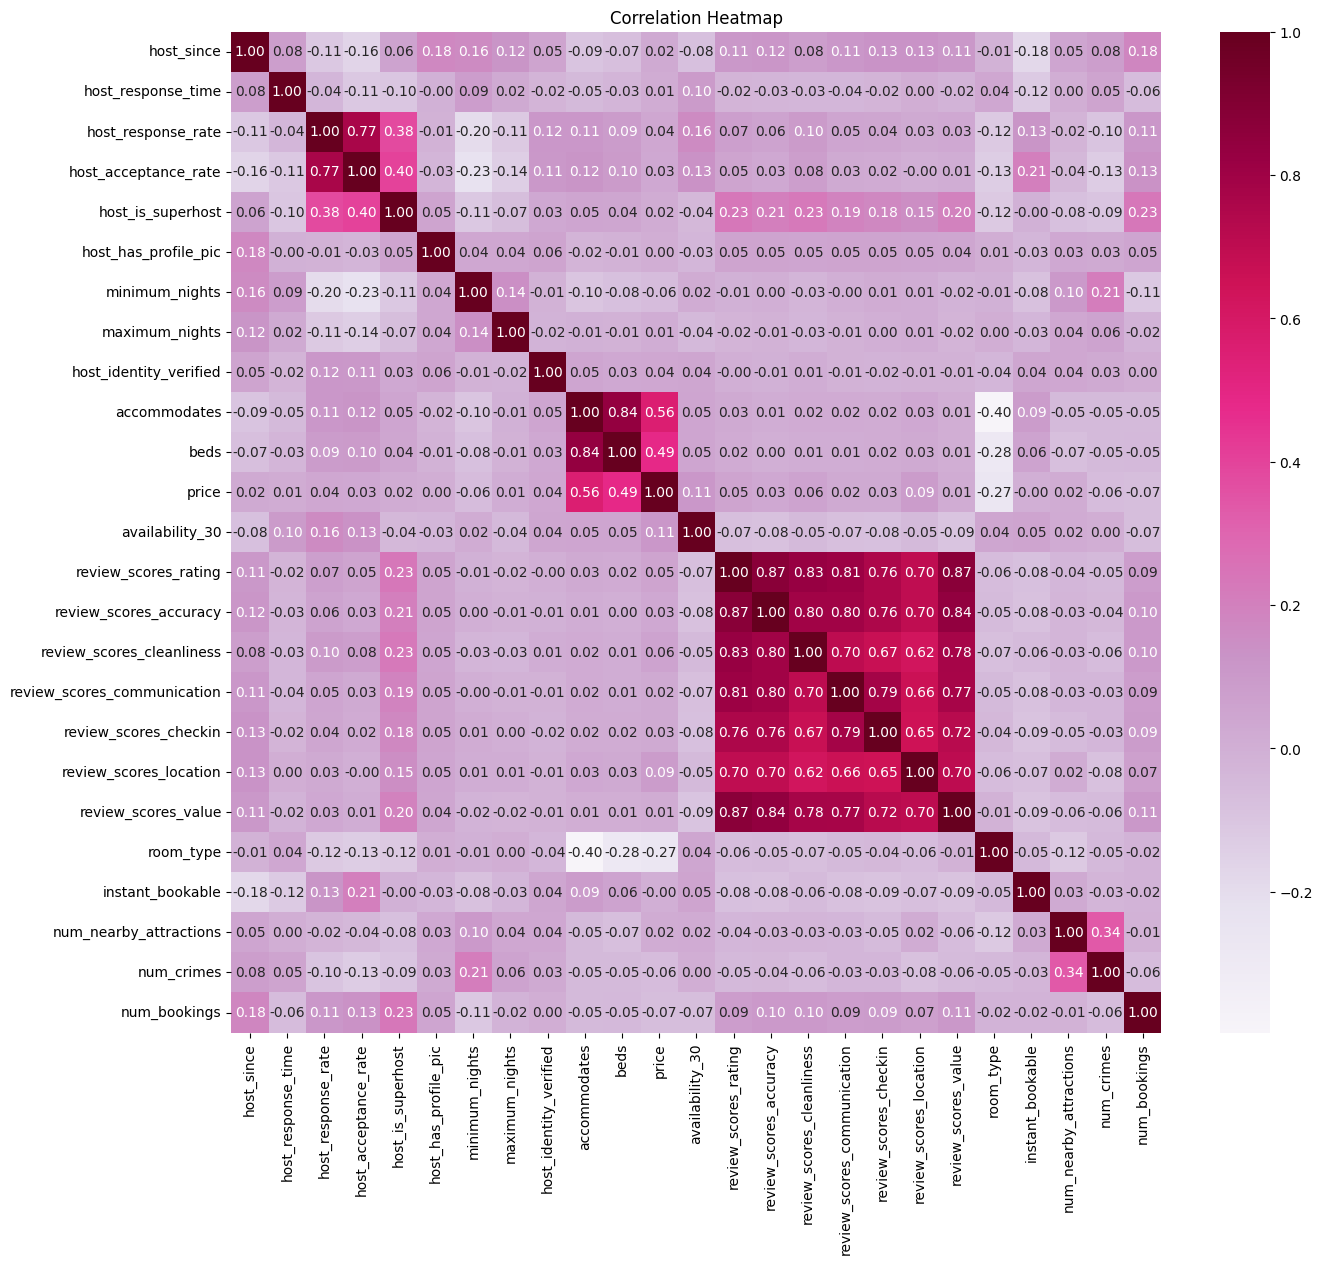

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

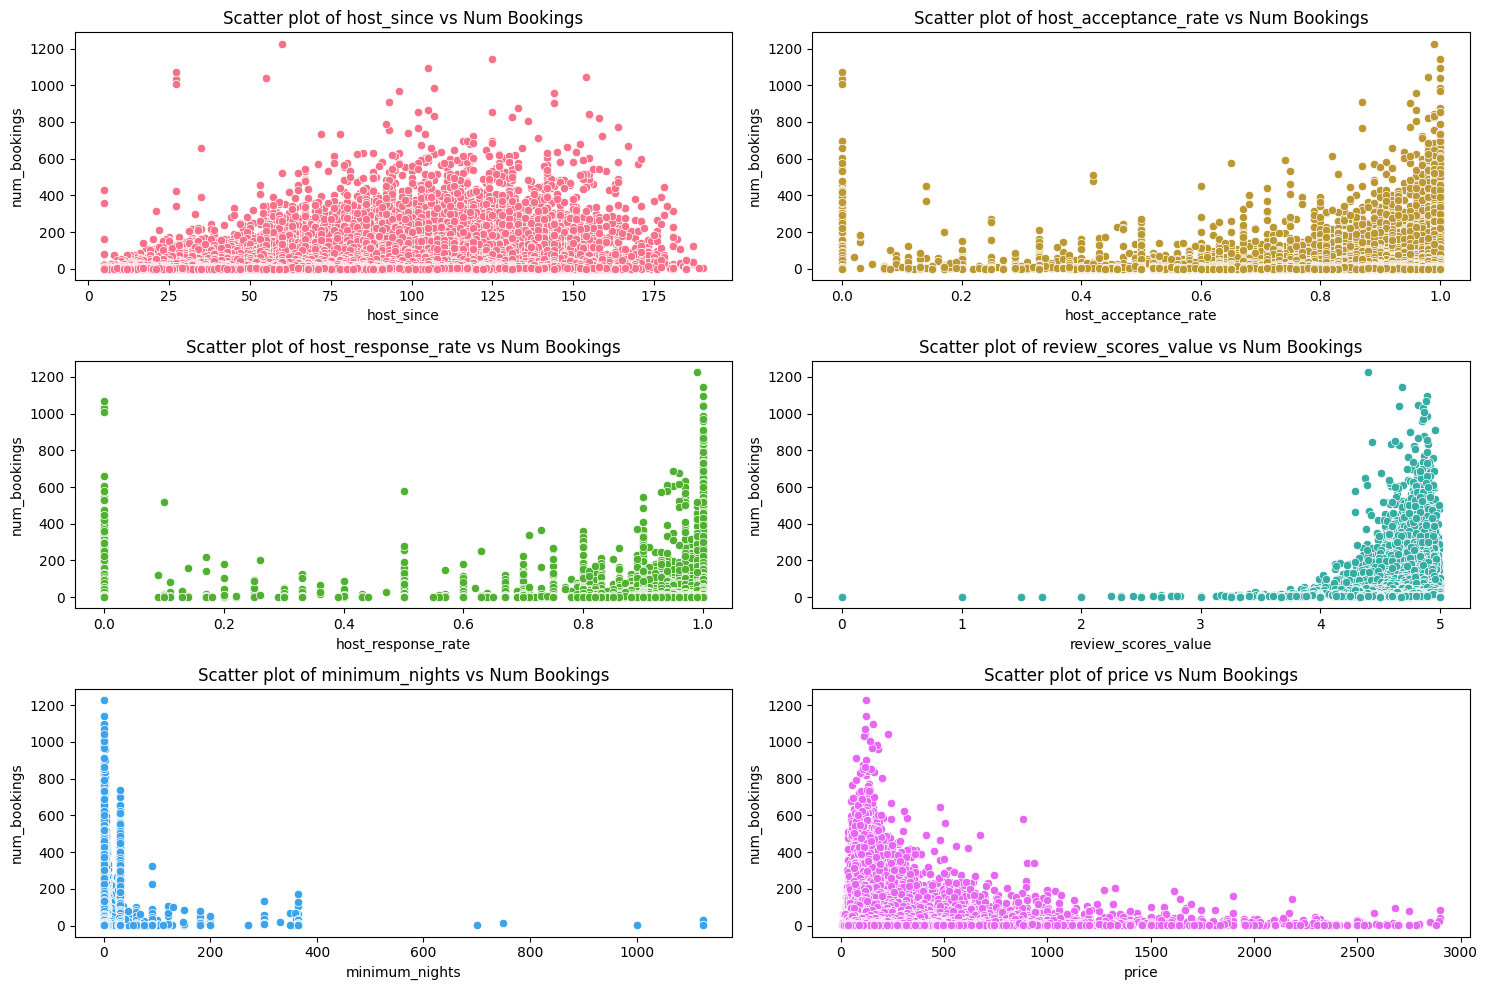

In [ ]:
# Plot scatter plots for features with the highest positive and negative correlations with num_bookings
features_to_plot = ["host_since", "host_acceptance_rate", "host_response_rate", "review_scores_value", "minimum_nights", "price"]

# Create a figure with subplots
plt.figure(figsize=(15, 10))
color_palette = sns.color_palette("husl", 6)

# Loop through the list of features and create scatter plots
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df_numeric, x=feature, y="num_bookings", color=color_palette[i - 1])
    plt.title(f"Scatter plot of {feature} vs Num Bookings")

plt.tight_layout()
plt.show()

<ipython-input-339-89acdce143a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='room_type', data=df, palette=palette)


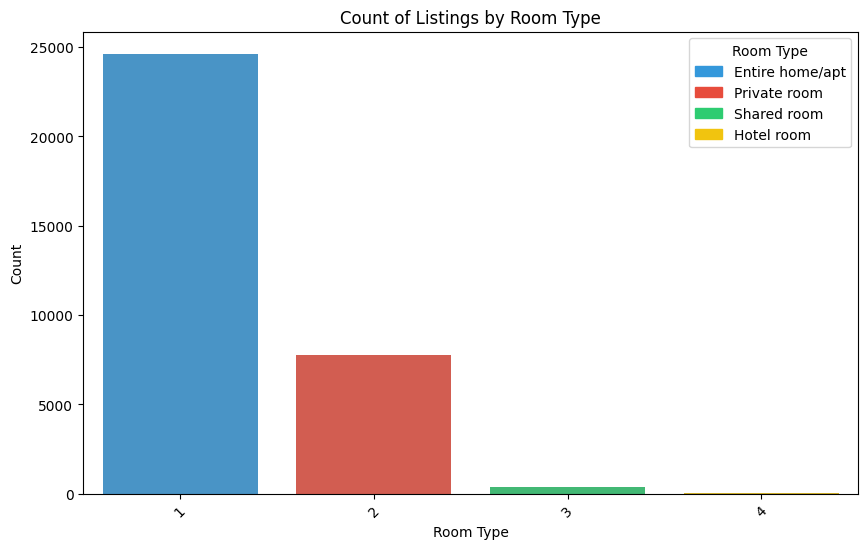

In [ ]:
# Count plot for room types
plt.figure(figsize=(10, 6))
palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"]
ax = sns.countplot(x='room_type', data=df, palette=palette)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
patches = [mpatches.Patch(color=palette[i], label=room_types[i]) for i in range(len(room_types))]
plt.legend(handles=patches, title='Room Type')

plt.show()

<ipython-input-340-dc5f98ae0efe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')


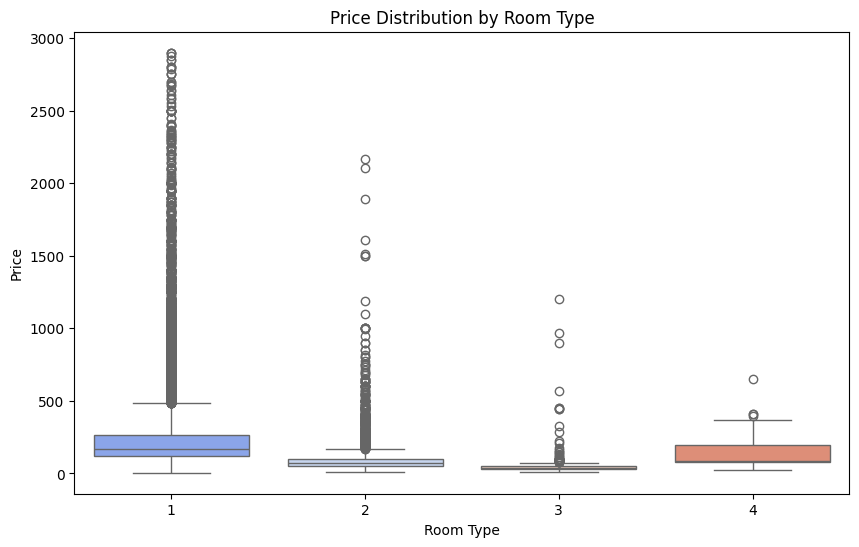

In [ ]:
# Boxplot of prices by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Clustering

In [ ]:
# Making clusters of the all the listings available
grouped_df = df
grouped_df2 = df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

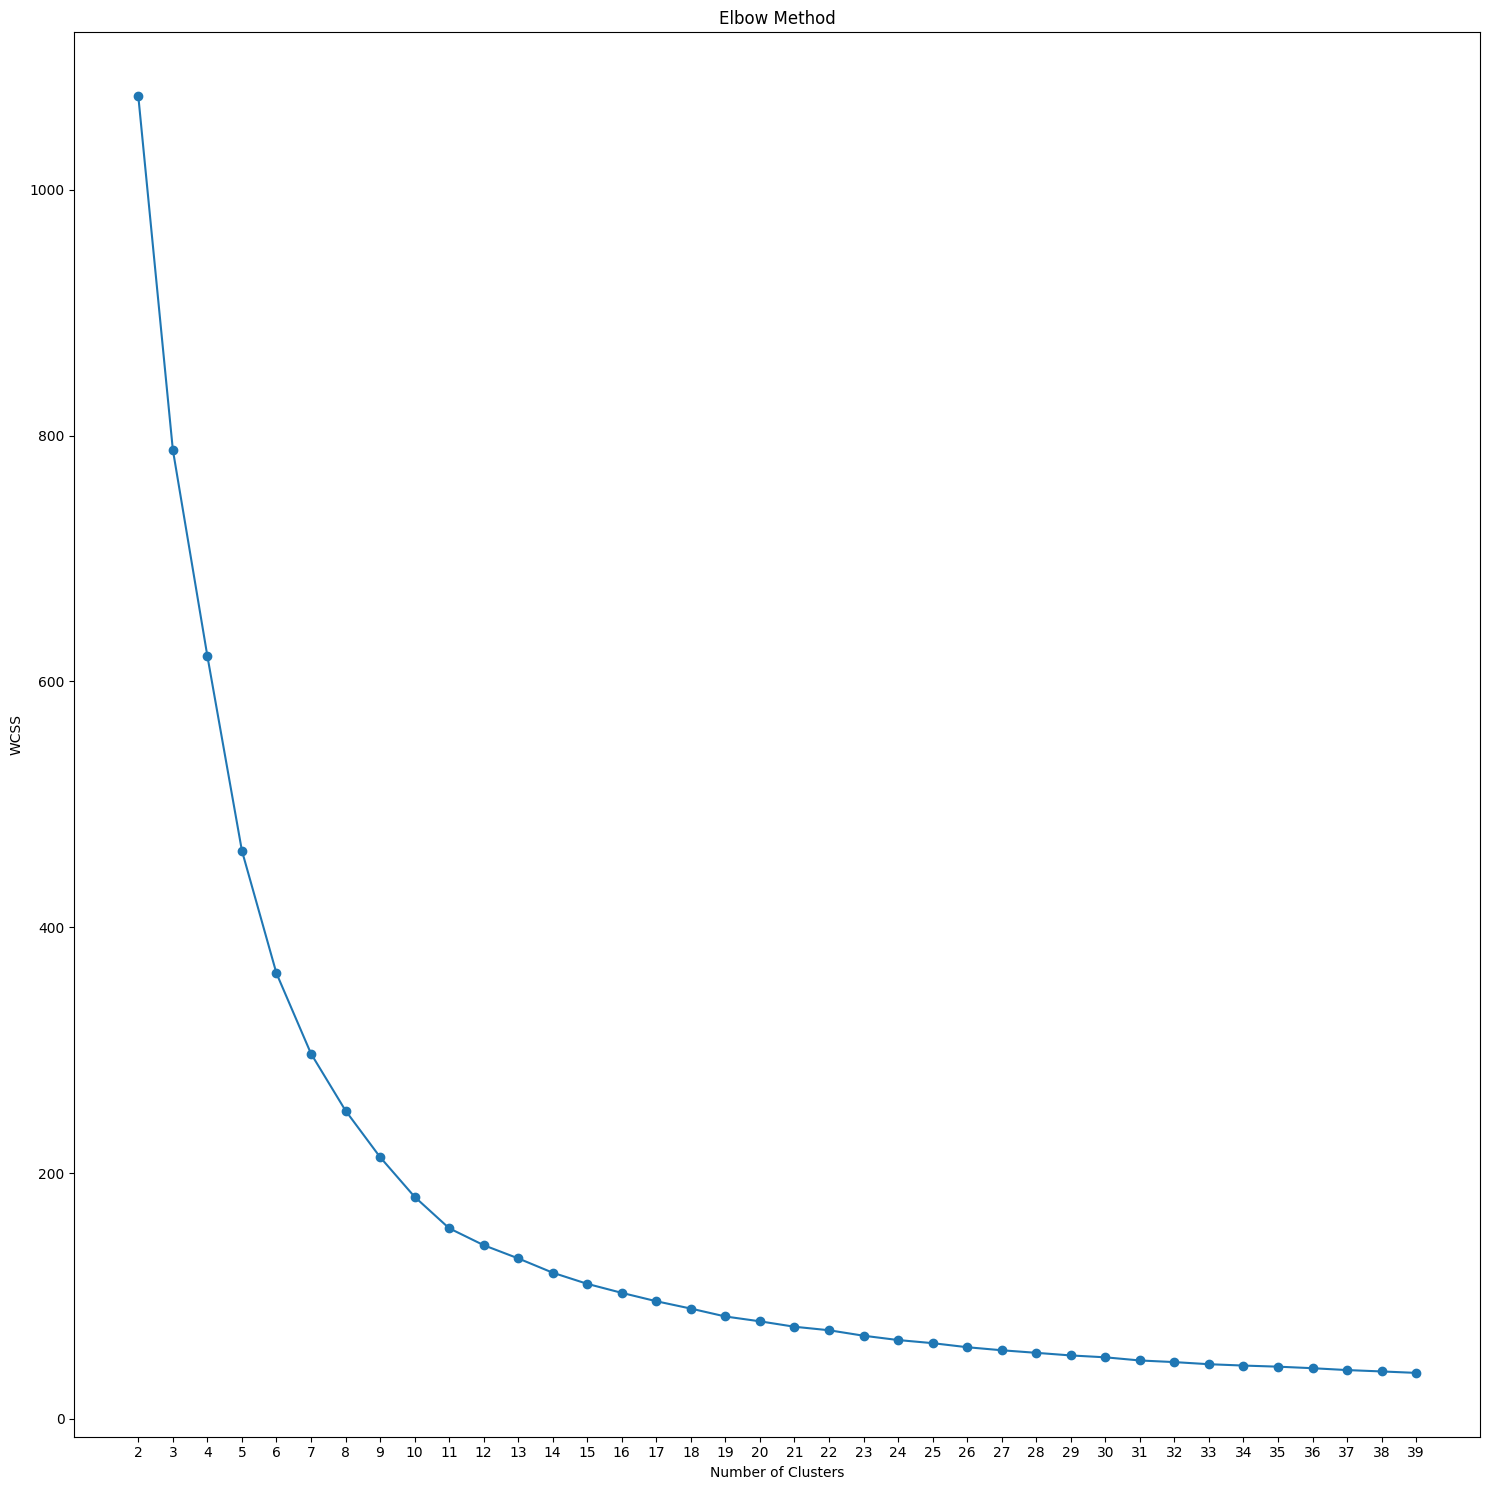

In [ ]:
coords = grouped_df[['latitude', 'longitude']]

# Initialize lists to store WCSS and silhouette scores
wcss = []

# Define range of clusters to try
k_values = range(2, 40)

# Calculate WCSS and silhouette scores for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

# Determine the optimal k using the Elbow method
optimal_k_elbow = None
elbow_value = float('inf')
for i in range(1, len(wcss)):
    diff = wcss[i-1] - wcss[i]
    if diff < elbow_value:
        elbow_value = diff
        optimal_k_elbow = k_values[i]

# Plot the elbow curve
plt.figure(figsize=(15,15))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [ ]:
# Print the optimal k
print(f"Optimal k using the Elbow method: {optimal_k_elbow}")

Optimal k using the Elbow method: 35


In [ ]:
# Analysis between clusters
coords = grouped_df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=35, random_state=0).fit(coords)
grouped_df['cluster_label'] = kmeans.labels_

# Now we have a 'cluster_label' for each listing indicating its geographic group.
# For zip code grouping
grouped_zip = grouped_df.groupby('zipcode')['num_bookings'].agg(['mean', 'median', 'count']).sort_values(by='mean')

# For clusters based on coordinates
grouped_coords = grouped_df.groupby('cluster_label')['num_bookings'].agg(['mean', 'median', 'count']).sort_values(by='mean')

# Display the groups
grouped_zip.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,mean,median,count
zipcode,,,
91321,7.500000,7.5,2
90015,7.677419,2.0,31
93591,9.000000,6.5,16
93560,11.000000,9.5,4
90703,12.400000,8.0,10


In [ ]:
grouped_coords.head()

,mean,median,count
cluster_label,,,
16,30.520138,13.0,869
13,30.783784,11.5,518
5,30.857771,7.0,2503
33,32.154762,11.0,84
8,32.344237,10.5,642


In [ ]:
# Identify top and bottom groups
top_groups = grouped_coords[grouped_coords['mean'] > grouped_coords['mean'].quantile(0.75)]
bottom_groups = grouped_coords[grouped_coords['mean'] < grouped_coords['mean'].quantile(0.25)]

In [ ]:
top_groups

,mean,median,count
cluster_label,,,
0,55.451220,20.0,1312
15,56.606397,29.0,1532
22,56.988180,18.0,423
18,59.879926,18.0,2157
7,61.682773,26.0,1428
28,62.950392,24.0,1149
24,66.400000,25.5,820
14,68.269360,23.0,297
32,92.425386,36.0,583


In [ ]:
bottom_groups

,mean,median,count
cluster_label,,,
16,30.520138,13.0,869
13,30.783784,11.5,518
5,30.857771,7.0,2503
33,32.154762,11.0,84
8,32.344237,10.5,642
31,34.158218,11.0,651
4,35.037199,13.0,457
17,36.989358,10.0,3007
3,37.676871,15.0,1176


In [ ]:
# Extract listings from top and bottom groups
top_listings = grouped_df[grouped_df['cluster_label'].isin(top_groups.index)]
bottom_listings = grouped_df[grouped_df['cluster_label'].isin(bottom_groups.index)]

In [ ]:
top_listings

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings,cluster_label
2,2732,3041,187.0,"Santa Monica, CA",1,1.00,0.42,0,1,7,...,4.91,4.22,0,34.004400,-118.480950,90401,16,543.0,24,18
4,5728,9171,181.0,"Los Angeles, CA",12,1.00,0.79,0,1,30,...,4.79,4.69,0,33.987500,-118.432000,90094,2,5551.0,316,18
5,5843,9171,181.0,"Los Angeles, CA",12,1.00,0.79,0,1,30,...,4.75,4.53,0,33.987500,-118.432000,90094,2,5551.0,128,18
14,7992,22363,178.0,"Los Angeles, CA",12,1.00,1.00,1,1,30,...,4.93,4.89,0,34.113640,-118.260680,90039,4,4906.0,292,0
16,9140,28350,177.0,"Long Beach, CA",1,0.00,0.00,0,1,31,...,4.69,4.81,1,33.772020,-118.188520,90831,13,32.0,392,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32818,1035991276560268412,291712198,55.0,Unknown,1,1.00,0.95,0,1,2,...,5.00,5.00,1,33.772283,-118.191674,90831,11,32.0,1,7
32820,1035823368444930932,259516942,59.0,Unknown,1,0.99,1.00,0,1,1,...,5.00,5.00,1,34.050270,-118.095110,91755,0,0.0,1,15
32821,1035828230679193630,259516942,59.0,Unknown,1,0.99,1.00,0,1,1,...,5.00,5.00,1,34.047090,-118.091720,91755,0,0.0,1,15
32822,1035830063666876574,259516942,59.0,Unknown,1,0.99,1.00,0,1,1,...,5.00,5.00,1,34.050282,-118.094822,91755,0,0.0,1,15


In [ ]:
bottom_listings

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings,cluster_label
1,2708,3008,187.0,"Los Angeles, CA",1,0.00,1.00,1,1,30,...,4.95,4.88,1,34.096250,-118.346050,90038,20,18534.0,40,17
3,63416,309512,160.0,"Los Angeles, CA",1,1.00,0.96,1,1,2,...,4.97,4.90,0,34.113440,-118.323990,90028,3,22239.0,161,17
7,67792,334952,159.0,"West Hollywood, CA",12,1.00,0.85,0,1,30,...,4.94,4.71,0,34.081870,-118.389650,90069,5,2434.0,35,5
8,6033,11619,181.0,"California, United States",12,1.00,0.84,0,1,30,...,4.65,4.29,0,34.168870,-118.644780,91367,0,6560.0,20,8
11,74770,394279,158.0,"Los Angeles, CA",1,1.00,0.88,1,1,2,...,4.88,4.89,0,34.181770,-118.526210,91335,1,14196.0,220,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32805,1029975183123541400,433615218,29.0,Unknown,1,1.00,0.95,0,1,1,...,5.00,5.00,0,34.594495,-118.164883,93551,0,0.0,2,4
32807,1031238219622873950,17845034,117.0,"San Gabriel, CA",1,1.00,1.00,0,1,1,...,5.00,5.00,0,33.984189,-117.937163,91745,1,0.0,2,16
32816,1035097198274980117,450843038,25.0,"Los Angeles, CA",1,1.00,1.00,0,1,1,...,5.00,5.00,0,34.015100,-118.179820,90023,1,5455.0,1,13
32817,1035173458274493345,512545698,12.0,Unknown,1,1.00,1.00,1,1,1,...,5.00,5.00,1,33.974888,-117.867365,91748,1,0.0,1,16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


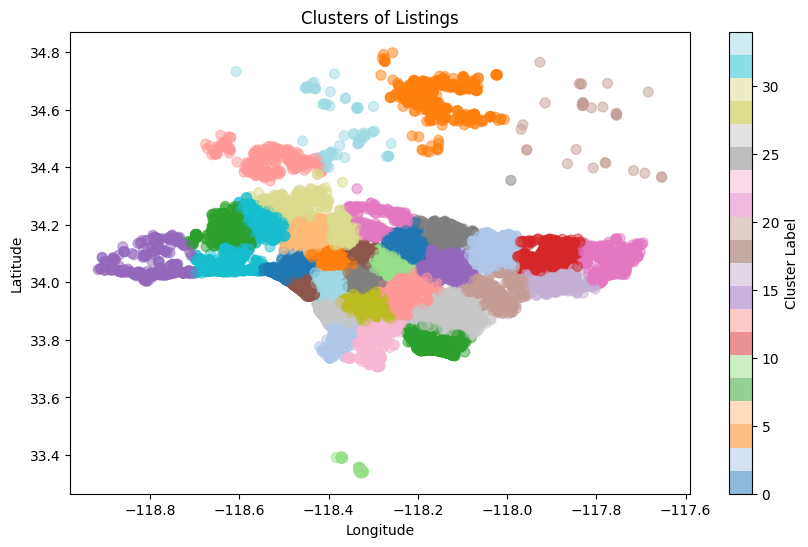

In [ ]:
coords = grouped_df[['latitude', 'longitude']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=35, random_state=0).fit(coords)

# Assign cluster labels to the original DataFrame
grouped_df['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['longitude'], grouped_df['latitude'], c=grouped_df['cluster_label'], cmap='tab20', marker='o', s=50, alpha=0.5)
plt.title('Clusters of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# filename = 'kmeans.sav'
# pickle.dump(kmeans, open(filename, 'wb'))

# Main Analysis

In [ ]:
grouped_df3= df

In [ ]:
grouped_df3.head()

,listing_id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,...,review_scores_location,review_scores_value,instant_bookable,latitude,longitude,zipcode,num_nearby_attractions,num_crimes,num_bookings,cluster_label
0,109,521,190.0,"San Francisco, CA",1,0.0,0.50,0,1,30,...,5.00,4.00,0,33.98301,-118.38607,90230,2,1646.0,2,34
1,2708,3008,187.0,"Los Angeles, CA",1,0.0,1.00,1,1,30,...,4.95,4.88,1,34.09625,-118.34605,90038,20,18534.0,40,17
2,2732,3041,187.0,"Santa Monica, CA",1,1.0,0.42,0,1,7,...,4.91,4.22,0,34.00440,-118.48095,90401,16,543.0,24,18
3,63416,309512,160.0,"Los Angeles, CA",1,1.0,0.96,1,1,2,...,4.97,4.90,0,34.11344,-118.32399,90028,3,22239.0,161,17
4,5728,9171,181.0,"Los Angeles, CA",12,1.0,0.79,0,1,30,...,4.79,4.69,0,33.98750,-118.43200,90094,2,5551.0,316,18


In [ ]:
# grouped_df3.to_csv("/content/drive/MyDrive/DSCI599/project-599/data_for_newlisting_prediction.csv")

In [ ]:
# Segment listings by 'cluster_label'
zip_groups = grouped_df3.groupby('cluster_label')

# Placeholder for analysis results
analysis_results = []

high_performers_labelled_final = pd.DataFrame()
low_performers_labelled_final = pd.DataFrame()

for name, group in zip_groups:
    # Calculate the median number of bookings in this group
    median_bookings = group['num_bookings'].median()

    # Separate the group into low and high performers
    low_performers = group[group['num_bookings'] <= median_bookings]
    high_performers = group[group['num_bookings'] > median_bookings]

    # Find the mode of the binary and categorical features
    low_mode = low_performers[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'room_type']].mode().iloc[0].astype(int)
    high_mode = high_performers[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'room_type']].mode().iloc[0].astype(int)

    # Compare average values of other features
    low_mean = low_performers[['host_since', 'host_acceptance_rate', 'host_response_rate', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy',
                               'review_scores_communication', 'review_scores_rating', 'review_scores_location','review_scores_checkin', 'num_nearby_attractions',
                               'maximum_nights', 'beds', 'accommodates', 'num_crimes', 'host_response_time', 'availability_30', 'price', 'minimum_nights', 'num_bookings']].mean()
    high_mean = high_performers[['host_since','host_acceptance_rate', 'host_response_rate', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy',
                                 'review_scores_communication', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin','num_nearby_attractions',
                                 'maximum_nights', 'beds', 'accommodates', 'num_crimes', 'host_response_time', 'availability_30', 'price', 'minimum_nights','num_bookings']].mean()

    # Combine mode and mean results into one Series
    low_performance_metrics = pd.concat([low_mean, low_mode])
    high_performance_metrics = pd.concat([high_mean, high_mode])

    # Store results
    analysis_results.append({
        'cluster_label': name,
        'low_performer': low_performance_metrics,
        'high_performer': high_performance_metrics
    })

# Convert results to DataFrame for easier handling and visualization
results_df = pd.DataFrame(analysis_results)

In [ ]:
pd.set_option('display.max_colwidth', None)
results_df.head(2)

,cluster_label,low_performer,high_performer
0,0,host_since 89.102719 host_acceptance_rate 0.681480 host_response_rate 0.690121 review_scores_value 4.711163 review_scores_cleanliness 4.725906 review_scores_accuracy 4.785967 review_scores_communication 4.848837 review_scores_rating 4.778308 review_scores_location 4.799441 review_scores_checkin 4.839381 num_nearby_attractions 2.903323 maximum_nights 474.285498 beds 2.057402 accommodates 3.749245 num_crimes 2873.672205 host_response_time 6.093656 availability_30 10.481873 price 191.951662 minimum_nights 17.835347 num_bookings 6.445619 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64,host_since 98.712308 host_acceptance_rate 0.839446 host_response_rate 0.853569 review_scores_value 4.797031 review_scores_cleanliness 4.826923 review_scores_accuracy 4.872954 review_scores_communication 4.919400 review_scores_rating 4.849431 review_scores_location 4.842477 review_scores_checkin 4.907908 num_nearby_attractions 2.835385 maximum_nights 454.524615 beds 1.996923 accommodates 3.578462 num_crimes 3126.806154 host_response_time 3.341538 availability_30 9.486154 price 170.813846 minimum_nights 12.573846 num_bookings 105.361538 host_is_superhost 1.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64
1,1,host_since 97.638831 host_acceptance_rate 0.709186 host_response_rate 0.776576 review_scores_value 4.575449 review_scores_cleanliness 4.679301 review_scores_accuracy 4.757912 review_scores_communication 4.806451 review_scores_rating 4.741106 review_scores_location 4.852443 review_scores_checkin 4.841733 num_nearby_attractions 5.934238 maximum_nights 626.296451 beds 1.950939 accommodates 3.424843 num_crimes 4752.394572 host_response_time 5.327766 availability_30 13.887265 price 226.985386 minimum_nights 26.316284 num_bookings 4.441545 host_is_superhost 0.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64,host_since 98.120495 host_acceptance_rate 0.821475 host_response_rate 0.851712 review_scores_value 4.690011 review_scores_cleanliness 4.772128 review_scores_accuracy 4.832466 review_scores_communication 4.887173 review_scores_rating 4.801081 review_scores_location 4.888975 review_scores_checkin 4.867218 num_nearby_attractions 6.801802 maximum_nights 545.490991 beds 1.878378 accommodates 3.356982 num_crimes 4464.692568 host_response_time 3.412162 availability_30 12.961712 price 210.764640 minimum_nights 16.465090 num_bookings 78.890766 host_is_superhost 1.000000 host_has_profile_pic 1.000000 host_identity_verified 1.000000 instant_bookable 0.000000 room_type 1.000000 dtype: float64


In [ ]:
results_df.sort_values(by=['cluster_label'], ascending=True)

temp_low = pd.DataFrame()

for i in range(len(results_df["low_performer"])):
  x = results_df["low_performer"][i]
  x.head()
  new_df = pd.DataFrame()
  # Add each value from the series as a new column to the DataFrame
  new_df["cluster_label"] = [i]
  for index, value in x.items():
      new_df[index+"_low"] = [value]

  temp_low = pd.concat([temp_low, new_df], axis=0)

# Now new_df has all the data from results_df2 as columns
temp_low.head()

temp_high = pd.DataFrame()

for i in range(len(results_df["high_performer"])):
  x = results_df["high_performer"][i]
  x.head()
  new_df = pd.DataFrame()
  new_df["cluster_label"] = [i]
  # Add each value from the series as a new column to the DataFrame
  for index, value in x.items():
      new_df[index+"_high"] = [value]

  temp_high = pd.concat([temp_high, new_df], axis=0)

# Now new_df has all the data from results_df2 as columns
temp_merged = pd.merge(temp_low, temp_high, on='cluster_label', how='inner')
temp_merged.head(10)

,cluster_label,host_since_low,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,...,host_response_time_high,availability_30_high,price_high,minimum_nights_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
0,0,89.102719,0.681480,0.690121,4.711163,4.725906,4.785967,4.848837,4.778308,4.799441,...,3.341538,9.486154,170.813846,12.573846,105.361538,1.0,1.0,1.0,0.0,1.0
1,1,97.638831,0.709186,0.776576,4.575449,4.679301,4.757912,4.806451,4.741106,4.852443,...,3.412162,12.961712,210.764640,16.465090,78.890766,1.0,1.0,1.0,0.0,1.0
2,2,84.813953,0.644791,0.660744,4.694884,4.744465,4.799442,4.867721,4.772326,4.901581,...,3.311005,11.684211,273.866029,8.947368,90.602871,1.0,1.0,1.0,0.0,1.0
3,3,64.387205,0.758434,0.777744,4.621684,4.628822,4.711145,4.756582,4.668030,4.735741,...,1.965636,11.089347,126.536082,4.204467,70.635739,1.0,1.0,1.0,0.0,1.0
4,4,65.021186,0.752797,0.787966,4.635000,4.658602,4.694831,4.724153,4.671907,4.666314,...,2.443439,12.266968,96.719457,2.723982,66.325792,1.0,1.0,1.0,0.0,2.0
5,5,71.860592,0.690631,0.736955,4.341511,4.407967,4.471098,4.561449,4.435249,4.632251,...,4.566858,15.124692,302.250205,17.405250,60.441345,0.0,1.0,1.0,0.0,1.0
6,6,87.898219,0.641476,0.644249,4.699746,4.749746,4.791908,4.831374,4.771323,4.830407,...,4.122016,12.790451,259.395225,16.705570,84.469496,1.0,1.0,1.0,0.0,1.0
7,7,82.125348,0.758370,0.763844,4.695279,4.755195,4.796908,4.859568,4.773259,4.755669,...,2.563380,13.098592,176.587324,9.592958,115.478873,1.0,1.0,1.0,0.0,1.0
8,8,81.922118,0.729408,0.710592,4.612461,4.686168,4.741807,4.800935,4.729751,4.788972,...,4.006231,14.510903,215.853583,14.227414,60.738318,1.0,1.0,1.0,0.0,1.0
9,9,58.549550,0.948559,0.931532,4.254144,4.439730,4.529279,4.518649,4.495045,4.867568,...,3.300000,17.509091,367.554545,1.736364,86.400000,0.0,1.0,1.0,1.0,1.0


In [ ]:
# temp_merged.to_csv("/content/drive/MyDrive/DSCI599/project-599/clusters.csv")

In [ ]:
# Create an empty DataFrame to store the mean values
cluster_means = pd.DataFrame()

# Iterate over each cluster label
for cluster_label in results_df['cluster_label'].unique():
    # Extract low and high performer data for the current cluster
    low_performer_data = results_df.loc[results_df['cluster_label'] == cluster_label, 'low_performer'].iloc[0]
    high_performer_data = results_df.loc[results_df['cluster_label'] == cluster_label, 'high_performer'].iloc[0]

    # Create a DataFrame to hold the mean values for the current cluster
    cluster_mean = pd.DataFrame({'cluster_label': [cluster_label]})

    # Calculate the mean for each feature and add it to the DataFrame
    for feature in low_performer_data.index:
        mean_value = (low_performer_data[feature] + high_performer_data[feature]) / 2
        cluster_mean[feature] = [mean_value]

    # Append the mean values for the current cluster to the main DataFrame
    cluster_means = pd.concat([cluster_means, cluster_mean], axis=0)

# Reset index of the final DataFrame
cluster_means.reset_index(drop=True, inplace=True)

# Display the mean values for each cluster
cluster_means.head()

,cluster_label,host_since,host_acceptance_rate,host_response_rate,review_scores_value,review_scores_cleanliness,review_scores_accuracy,review_scores_communication,review_scores_rating,review_scores_location,...,host_response_time,availability_30,price,minimum_nights,num_bookings,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,room_type
0,0,93.907513,0.760463,0.771845,4.754097,4.776415,4.829460,4.884118,4.813869,4.820959,...,4.717597,9.984013,181.382754,15.204597,55.903579,0.5,1.0,1.0,0.0,1.0
1,1,97.879663,0.765331,0.814144,4.632730,4.725715,4.795189,4.846812,4.771094,4.870709,...,4.369964,13.424488,218.875013,21.390687,41.666155,0.5,1.0,1.0,0.0,1.0
2,2,88.978747,0.739572,0.758434,4.750073,4.799266,4.841132,4.893884,4.816904,4.909451,...,4.150851,10.263035,263.558596,13.043452,47.950273,0.5,1.0,1.0,0.0,1.0
3,3,68.018345,0.810523,0.825882,4.692070,4.690536,4.770839,4.819219,4.725029,4.759872,...,2.675579,12.497535,133.569388,6.354759,38.009789,0.5,1.0,1.0,0.0,1.0
4,4,69.558105,0.825606,0.852829,4.743880,4.752355,4.793976,4.826036,4.772673,4.755374,...,3.211126,13.805094,106.228373,3.861991,36.031540,0.5,1.0,1.0,0.0,2.0


Taking mean so we can generalize for all clusters

In [ ]:

mean_result = temp_merged.mean()
mean_result.head(100)

cluster_label                         17.000000
host_since_low                        76.414252
host_acceptance_rate_low               0.735505
host_response_rate_low                 0.756756
review_scores_value_low                4.630527
review_scores_cleanliness_low          4.681530
review_scores_accuracy_low             4.728820
review_scores_communication_low        4.792755
review_scores_rating_low               4.712198
review_scores_location_low             4.753947
review_scores_checkin_low              4.800353
num_nearby_attractions_low             2.989834
maximum_nights_low                   488.012849
beds_low                               2.431406
accommodates_low                       4.201738
num_crimes_low                      3394.673902
host_response_time_low                 4.351030
availability_30_low                   13.893221
price_low                            231.681005
minimum_nights_low                    15.038404
num_bookings_low                       5

In [ ]:
mean_result_df = mean_result.to_frame().transpose().head()

Comparing average low performing listing with average high performing listing

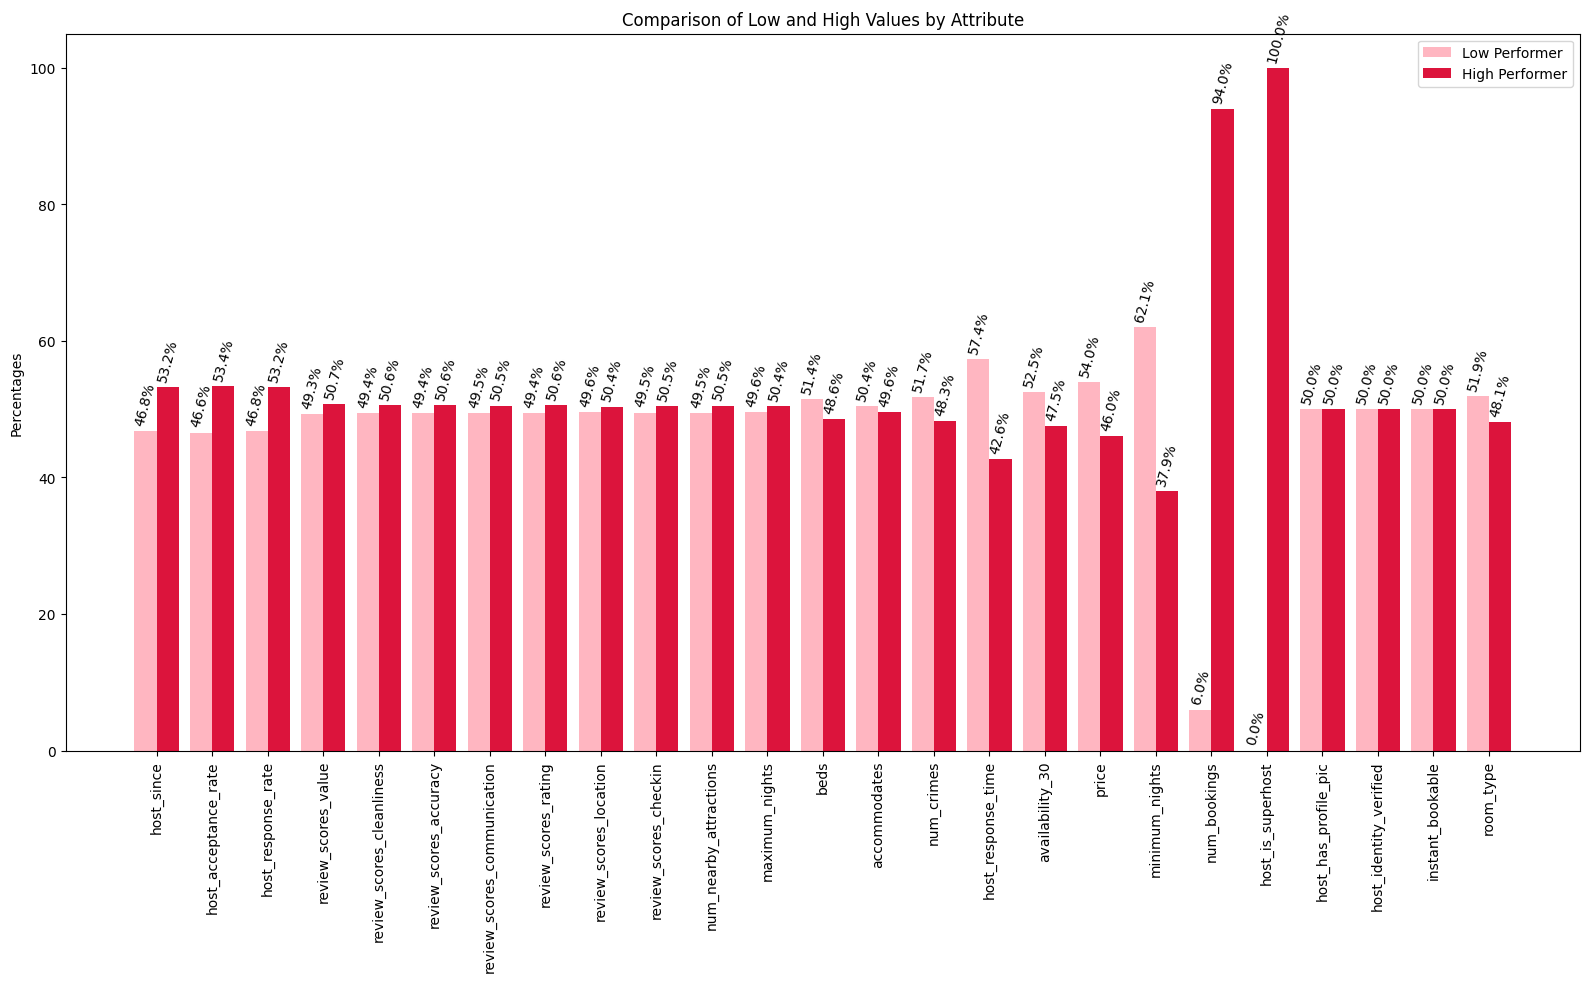

In [ ]:
mean_result_df.drop(['cluster_label'], axis=1)

# Prepare data for plotting
attributes = []
low_values = []
high_values = []

# Extract attributes and calculate percentages
for column in mean_result_df.columns:
    if '_low' in column:
        attribute_name = column.replace('_low', '')
        low_value = mean_result_df[column][0]
        high_value = mean_result_df[f'{attribute_name}_high'][0]
        total = low_value + high_value
        low_percentage = (low_value / total) * 100
        high_percentage = (high_value / total) * 100
        attributes.append(attribute_name)
        low_values.append(low_percentage)
        high_values.append(high_percentage)

# Set up the bar graph with an increased figure size
fig, ax = plt.subplots(figsize=(16, 8))
width = 0.40

x = range(len(attributes))
rects1 = ax.bar(x, low_values, width, label='Low Performer', color='lightpink')
rects2 = ax.bar([p + width for p in x], high_values, width, label='High Performer', color='crimson')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Comparison of Low and High Values by Attribute')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(attributes)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=75)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Show the plot
plt.xticks(rotation=90)
plt.show()

# Suggestions

## Existing Host

### Get the cluster-wise low performers and high performers data

In [ ]:
x5 = '/content/drive/My Drive/DSCI599/project-599/clusters.csv'
clusters = pd.read_csv(x5)
clusters = clusters.drop('Unnamed: 0', axis=1)
clusters.head()

,cluster_label,host_since_low,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,...,host_response_time_high,availability_30_high,price_high,minimum_nights_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
0,0,89.102719,0.681480,0.690121,4.711163,4.725906,4.785967,4.848837,4.778308,4.799441,...,3.341538,9.486154,170.813846,12.573846,105.361538,1.0,1.0,1.0,0.0,1.0
1,1,97.638831,0.709186,0.776576,4.575449,4.679301,4.757912,4.806451,4.741106,4.852443,...,3.412162,12.961712,210.764640,16.465090,78.890766,1.0,1.0,1.0,0.0,1.0
2,2,84.813953,0.644791,0.660744,4.694884,4.744465,4.799442,4.867721,4.772326,4.901581,...,3.311005,11.684211,273.866029,8.947368,90.602871,1.0,1.0,1.0,0.0,1.0
3,3,64.387205,0.758434,0.777744,4.621684,4.628822,4.711145,4.756582,4.668030,4.735741,...,1.965636,11.089347,126.536082,4.204467,70.635739,1.0,1.0,1.0,0.0,1.0
4,4,65.021186,0.752797,0.787966,4.635000,4.658602,4.694831,4.724153,4.671907,4.666314,...,2.443439,12.266968,96.719457,2.723982,66.325792,1.0,1.0,1.0,0.0,2.0


### Select a random record from original dataset and predict the cluster for it based on longitude and latitude

In [ ]:
# Let's take a random record
random_record = df.sample()

# Extract latitude and longitude values from the random record
latitude = random_record['latitude'].values[0]
longitude = random_record['longitude'].values[0]

# Predict the cluster label for the latitude and longitude values
predicted_cluster_label = kmeans.predict([[latitude, longitude]])

predicted_cluster_label_random_record = predicted_cluster_label[0]
print("Predicted Cluster Label:", predicted_cluster_label[0])

Predicted Cluster Label: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Get the cluster-wise feature values for the predicted cluster label from clusters df

In [ ]:
filtered_row = clusters[clusters['cluster_label'] == predicted_cluster_label_random_record]
filtered_row.head()

,cluster_label,host_since_low,host_acceptance_rate_low,host_response_rate_low,review_scores_value_low,review_scores_cleanliness_low,review_scores_accuracy_low,review_scores_communication_low,review_scores_rating_low,review_scores_location_low,...,host_response_time_high,availability_30_high,price_high,minimum_nights_high,num_bookings_high,host_is_superhost_high,host_has_profile_pic_high,host_identity_verified_high,instant_bookable_high,room_type_high
0,0,89.102719,0.68148,0.690121,4.711163,4.725906,4.785967,4.848837,4.778308,4.799441,...,3.341538,9.486154,170.813846,12.573846,105.361538,1.0,1.0,1.0,0.0,1.0


### Creat an ideal df with high performers for the predicted cluster

In [ ]:
high_features = [column for column in filtered_row.columns if column.endswith('_high')]

# Select the specified columns from the DataFrame
ideal_record = filtered_row[high_features]

# Rename columns by removing the suffix "_high"
ideal_record.columns = ideal_record.columns.str.replace('_high', '')

# Print the selected columns
ideal_record.head()

,host_since,host_acceptance_rate,host_response_rate,review_scores_value,review_scores_cleanliness,review_scores_accuracy,review_scores_communication,review_scores_rating,review_scores_location,review_scores_checkin,...,host_response_time,availability_30,price,minimum_nights,num_bookings,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,room_type
0,98.712308,0.839446,0.853569,4.797031,4.826923,4.872954,4.9194,4.849431,4.842477,4.907908,...,3.341538,9.486154,170.813846,12.573846,105.361538,1.0,1.0,1.0,0.0,1.0


### Keep only the required columns from the random record

In [ ]:
required_columns = [column for column in random_record.columns if column in ideal_record.columns]

# Select the specified columns from the DataFrame
random_record = random_record[required_columns]

# Print the selected columns
random_record.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,minimum_nights,maximum_nights,host_identity_verified,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,num_nearby_attractions,num_crimes,num_bookings
9128,130.0,1,1.0,0.43,0,1,30,90,1,1,...,5.0,5.0,5.0,5.0,5.0,4.88,0,6,4906.0,26


### Now we compare the ideal and existing listing and give suggestions

In [ ]:
# Initialize a dictionary to store suggestions
suggestions = {}

# Compare each column and generate suggestions
# positively correlated

if round(ideal_record['host_since'].iloc[0]) > random_record['host_since'].iloc[0]:
    suggestions['host_since'] = (random_record['host_since'].iloc[0], round(ideal_record['host_since'].iloc[0]))

if round(ideal_record['host_response_rate'].iloc[0], 2) > random_record['host_response_rate'].iloc[0]:
    suggestions['host_response_rate'] = (random_record['host_response_rate'].iloc[0], round(ideal_record['host_response_rate'].iloc[0], 4))

if round(ideal_record['host_acceptance_rate'].iloc[0], 2) > random_record['host_acceptance_rate'].iloc[0]:
    suggestions['host_acceptance_rate'] = (random_record['host_acceptance_rate'].iloc[0], round(ideal_record['host_acceptance_rate'].iloc[0], 4))

if ideal_record['host_has_profile_pic'].iloc[0] > random_record['host_has_profile_pic'].iloc[0]:
    suggestions['host_has_profile_pic'] = (random_record['host_has_profile_pic'].iloc[0], ideal_record['host_has_profile_pic'].iloc[0])

if ideal_record['host_is_superhost'].iloc[0] > random_record['host_is_superhost'].iloc[0]:
    suggestions['host_is_superhost'] = (random_record['host_is_superhost'].iloc[0], ideal_record['host_is_superhost'].iloc[0])

if ideal_record['host_identity_verified'].iloc[0] > random_record['host_identity_verified'].iloc[0]:
    suggestions['host_identity_verified'] = (random_record['host_identity_verified'].iloc[0], ideal_record['host_identity_verified'].iloc[0])

if ideal_record['review_scores_rating'].iloc[0] > random_record['review_scores_rating'].iloc[0]:
    suggestions['review_scores_rating'] = (random_record['review_scores_rating'].iloc[0], round(ideal_record['review_scores_rating'].iloc[0], 4))

if ideal_record['review_scores_accuracy'].iloc[0] > random_record['review_scores_accuracy'].iloc[0]:
    suggestions['review_scores_accuracy'] = (random_record['review_scores_accuracy'].iloc[0], round(ideal_record['review_scores_accuracy'].iloc[0], 4))

if ideal_record['review_scores_cleanliness'].iloc[0] > random_record['review_scores_cleanliness'].iloc[0]:
    suggestions['review_scores_cleanliness'] = (random_record['review_scores_cleanliness'].iloc[0], round(ideal_record['review_scores_cleanliness'].iloc[0], 4))

if ideal_record['review_scores_checkin'].iloc[0] > random_record['review_scores_checkin'].iloc[0]:
    suggestions['review_scores_checkin'] = (random_record['review_scores_checkin'].iloc[0], round(ideal_record['review_scores_checkin'].iloc[0], 4))

if ideal_record['review_scores_communication'].iloc[0] > random_record['review_scores_communication'].iloc[0]:
    suggestions['review_scores_communication'] = (random_record['review_scores_communication'].iloc[0], round(ideal_record['review_scores_communication'].iloc[0], 4))

if ideal_record['review_scores_location'].iloc[0] > random_record['review_scores_location'].iloc[0]:
    suggestions['review_scores_location'] = (random_record['review_scores_location'].iloc[0], round(ideal_record['review_scores_location'].iloc[0], 4))

if ideal_record['review_scores_value'].iloc[0] > random_record['review_scores_value'].iloc[0]:
    suggestions['review_scores_value'] = (random_record['review_scores_value'].iloc[0], round(ideal_record['review_scores_value'].iloc[0], 4))

if round(ideal_record['num_nearby_attractions'].iloc[0]) > random_record['num_nearby_attractions'].iloc[0]:
    suggestions['num_nearby_attractions'] = (round(random_record['num_nearby_attractions'].iloc[0]), round(ideal_record['num_nearby_attractions'].iloc[0]))

# negatively correlated

if round(ideal_record['host_response_time'].iloc[0]) < random_record['host_response_time'].iloc[0]:
    suggestions['host_response_time'] = (random_record['host_response_time'].iloc[0], round(ideal_record['host_response_time'].iloc[0]))

if round(ideal_record['minimum_nights'].iloc[0]) < random_record['minimum_nights'].iloc[0]:
    suggestions['minimum_nights'] = (round(random_record['minimum_nights'].iloc[0]), round(ideal_record['minimum_nights'].iloc[0]))

if round(ideal_record['maximum_nights'].iloc[0]) < random_record['maximum_nights'].iloc[0]:
    suggestions['maximum_nights'] = (round(random_record['maximum_nights'].iloc[0]), round(ideal_record['maximum_nights'].iloc[0]))

if ideal_record['price'].iloc[0] < random_record['price'].iloc[0]:
    suggestions['price'] = (random_record['price'].iloc[0], round(ideal_record['price'].iloc[0]))

if round(ideal_record['accommodates'].iloc[0]) < random_record['accommodates'].iloc[0]:
    suggestions['accommodates'] = (random_record['accommodates'].iloc[0], round(ideal_record['accommodates'].iloc[0]))

if round(ideal_record['beds'].iloc[0]) < random_record['beds'].iloc[0]:
    suggestions['beds'] = (round(random_record['beds'].iloc[0]), round(ideal_record['beds'].iloc[0]))

if round(ideal_record['room_type'].iloc[0]) < random_record['room_type'].iloc[0]:
    suggestions['room_type'] = (round(random_record['room_type'].iloc[0]), round(ideal_record['room_type'].iloc[0]))

if round(ideal_record['availability_30'].iloc[0]) < random_record['availability_30'].iloc[0]:
    suggestions['availability_30'] = (random_record['availability_30'].iloc[0], round(ideal_record['availability_30'].iloc[0]))

if ideal_record['instant_bookable'].iloc[0] < random_record['instant_bookable'].iloc[0]:
    suggestions['instant_bookable'] = (random_record['instant_bookable'].iloc[0], ideal_record['instant_bookable'].iloc[0])

if round(ideal_record['num_crimes'].iloc[0]) < random_record['num_crimes'].iloc[0]:
    suggestions['num_crimes'] = (round(random_record['num_crimes'].iloc[0]), round(ideal_record['num_crimes'].iloc[0]))

# Print suggestions
print("Suggestions:")
for column, (random_value, suggested_value) in suggestions.items():
    print(f"  - {column}: Original Value - {random_value}, Suggested Value - {suggested_value}")

Suggestions:
  - host_acceptance_rate: Original Value - 0.43, Suggested Value - 0.8394
  - host_is_superhost: Original Value - 0, Suggested Value - 1.0
  - minimum_nights: Original Value - 30, Suggested Value - 13
  - num_crimes: Original Value - 4906, Suggested Value - 3127


### Display actual vs suggested values

In [ ]:
# Convert suggestions dictionary to DataFrame
suggestions_df = pd.DataFrame.from_dict(suggestions, orient='index', columns=['Actual_Value', 'Suggested_Value'])

# Print the DataFrame
suggestions_df.head(100)

,Actual_Value,Suggested_Value
host_acceptance_rate,0.43,0.8394
host_is_superhost,0.00,1.0000
minimum_nights,30.00,13.0000
num_crimes,4906.00,3127.0000


### Percentage change improvements required for success/profitability

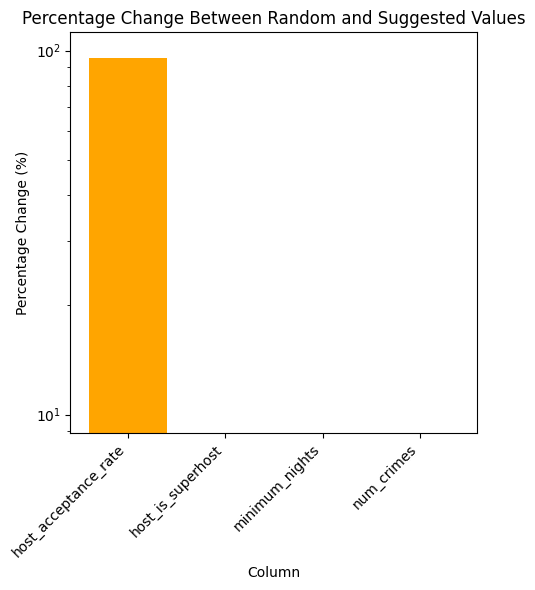

In [ ]:
# Calculate percentage change
suggestions_df['Percentage_Change'] = ((suggestions_df['Suggested_Value'] - suggestions_df['Actual_Value']) / suggestions_df['Actual_Value']) * 100

# Plot the percentage change with logarithmic scale
plt.figure(figsize=(5, 6))
plt.bar(suggestions_df.index, suggestions_df['Percentage_Change'], color='orange')
plt.title('Percentage Change Between Random and Suggested Values')
plt.xlabel('Column')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.tight_layout()
plt.show()

## New Host

In [ ]:
def predict_bookings(new_listing, kmeans_model, clusters_df):
    # Step 1: Get the cluster_label for the new listing
    cluster_label = kmeans_model.predict([[new_listing['latitude'], new_listing['longitude']]])[0]
    print(f"Cluster Label: {cluster_label}")

    # Step 2: Find the cluster data for the given cluster_label
    cluster_data = clusters_df[clusters_df['cluster_label'] == cluster_label].iloc[0]

    # Initialize counters for low and high performer tags
    low_performer_count = 0
    high_performer_count = 0
    suggestions = {}

    # Define which features are positively and negatively correlated with the number of bookings
    positively_correlated_features = [
        'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'num_nearby_attractions'
    ]
    negatively_correlated_features = [
        'host_response_time', 'minimum_nights', 'maximum_nights', 'price',
        'accommodates', 'beds', 'room_type', 'availability_30', 'instant_bookable',
        'num_crimes'
    ]
    # Map each feature value with the cluster data and tag them as low or high performer
    for feature in new_listing:
        if feature in ['latitude', 'longitude', 'num_bookings', 'cluster_label']:
            continue  # Skip non-comparable features
        feature_low = feature + '_low'
        feature_high = feature + '_high'
        if feature_low in cluster_data and feature_high in cluster_data:
            if feature in positively_correlated_features:
                # For positively correlated features, higher values are better
                if new_listing[feature] < cluster_data[feature_high]:
                    low_performer_count += 1
                    suggestions[feature] = f"Increase {feature}. Suggested value: {cluster_data[feature_high]}"
                else:
                    high_performer_count += 1
            elif feature in negatively_correlated_features:
                # For negatively correlated features, lower values are better
                if new_listing[feature] > cluster_data[feature_low]:
                    low_performer_count += 1
                    suggestions[feature] = f"Decrease {feature}. Suggested value: {cluster_data[feature_low]}"
                else:
                    high_performer_count += 1

    # Determine the overall performance level
    performance_level = 'High Performer' if high_performer_count >= low_performer_count else 'Low Performer'
    print(f"The new listing is a {performance_level}.")

    # Return the predicted number of bookings based on the performance level
    predicted_bookings = cluster_data['num_bookings_high'] if performance_level == 'High Performer' else cluster_data['num_bookings_low']
    print(f'Predicted number of bookings: {round(predicted_bookings)}')

    # Provide suggestions for low performers
    if performance_level == 'Low Performer':
        print("Suggestions for improvement:")
        for feature, suggestion in suggestions.items():
            if feature != 'num_crimes' and feature != 'num_nearby_attractions':
                print(f"  - {suggestion}")
        # Special suggestions for num_crimes and num_nearby_attractions
        if 'num_crimes' in suggestions:
            print("  - The number of crimes in your area is very high. Consider additional security measures.")
        if 'num_nearby_attractions' in suggestions:
            print("  - The number of attractions in your area is low. Consider promoting local attractions or events.")

    print()
    return round(predicted_bookings)

### Get new host's data and predict number of bookings

In [ ]:
# example of high performer

new_listing = {
    'host_has_profile_pic': 1,
    'minimum_nights': 30,
    'maximum_nights': 365,
    'host_identity_verified': 1,
    'room_type': 2,
    'accommodates': 2,
    'beds': 2.0,
    'price': 68.0,
    'availability_30': 30,
    'instant_bookable': 0,
    'latitude': 34.03858,
    'longitude': -118.32636,
    'num_nearby_attractions': 3,
    'num_crimes': 12731.0
}

predict_bookings(new_listing, kmeans, clusters)

Cluster Label: 25
The new listing is a High Performer.
Predicted number of bookings: 86



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


86

In [ ]:
# example of low performer

new_listing = {
    'host_has_profile_pic': 0,
    'minimum_nights': 10,
    'maximum_nights': 20,
    'host_identity_verified': 1,
    'room_type': 4,
    'accommodates': 8,
    'beds': 6.0,
    'price': 400.0,
    'availability_30': 100,
    'instant_bookable': 1,
    'latitude': 34.03858,
    'longitude': -118.32636,
    'num_nearby_attractions': 1,
    'num_crimes': 7000.0
}

predict_bookings(new_listing, kmeans, clusters)

Cluster Label: 25
The new listing is a Low Performer.
Predicted number of bookings: 4
Suggestions for improvement:
  - Increase host_has_profile_pic. Suggested value: 1.0
  - Decrease room_type. Suggested value: 1.0
  - Decrease accommodates. Suggested value: 3.3125
  - Decrease beds. Suggested value: 1.9969512195121952
  - Decrease price. Suggested value: 127.11128048780488
  - Decrease availability_30. Suggested value: 12.326219512195122
  - Decrease instant_bookable. Suggested value: 0.0
  - The number of attractions in your area is low. Consider promoting local attractions or events.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


4